<a href="https://colab.research.google.com/github/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [2]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas

df_persons = pandas.read_csv('https://github.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/raw/master/module3-databackedassertions/persons.csv', index_col=0)

df_persons.describe()


,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


In [4]:
bins_age = pandas.cut(df_persons['age'], 6)
bins_weight = pandas.cut(df_persons['weight'], 6)
bins_exercise_time = pandas.cut(df_persons['exercise_time'], 6)

pandas.crosstab(bins_weight, [bins_age, bins_exercise_time], normalize='columns')

age                (17.938, 28.333]                ... (69.667, 80.0]               
exercise_time          (-0.3, 50.0] (50.0, 100.0]  ... (100.0, 150.0] (150.0, 200.0]
weight                                             ...                              
(99.854, 124.333]          0.137931      0.114286  ...       0.311111       0.333333
(124.333, 148.667]         0.172414      0.228571  ...       0.111111       0.250000
(148.667, 173.0]           0.068966      0.228571  ...       0.222222       0.416667
(173.0, 197.333]           0.241379      0.171429  ...       0.266667       0.000000
(197.333, 221.667]         0.206897      0.257143  ...       0.088889       0.000000
(221.667, 246.0]           0.172414      0.000000  ...       0.000000       0.000000

[6 rows x 34 columns]

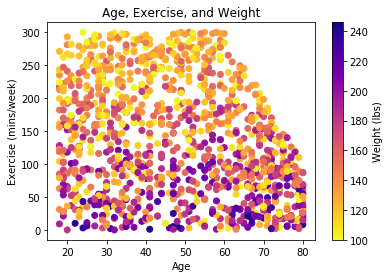

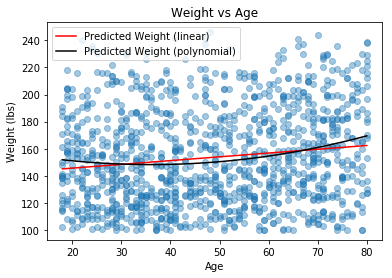

R^2 score for linear model: 0.020784465771999217
R^2 score for polynomial model: 0.02884937252524722


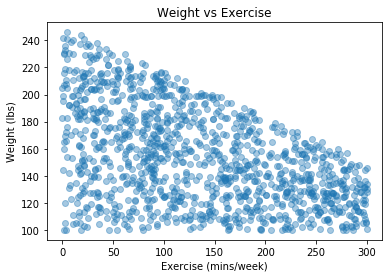

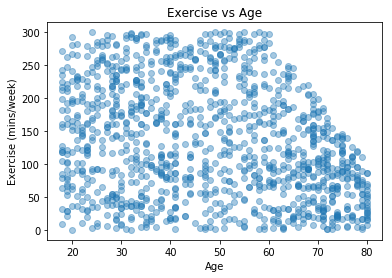

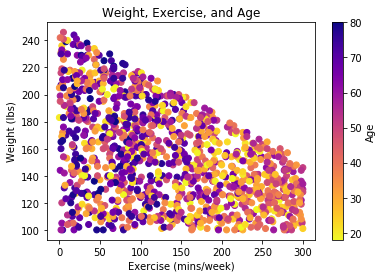

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

plt.scatter(df_persons['age'],df_persons['exercise_time'],c=df_persons['weight'],cmap='plasma_r')
plt.colorbar().set_label('Weight (lbs)')
plt.xlabel('Age')
plt.ylabel('Exercise (mins/week)')
plt.title('Age, Exercise, and Weight')
plt.show()


xPlot = np.linspace(min(df_persons['age']),max(df_persons['age'])).reshape(-1,1)
linearModel = LinearRegression()
reshaped = np.array(df_persons['age']).reshape(-1,1)
linearModel.fit(reshaped,df_persons['weight'])
linearPlot = linearModel.predict(xPlot)
polyModel = make_pipeline(PolynomialFeatures(2), Ridge())
reshaped = np.array(df_persons['age']).reshape(-1,1)
polyModel.fit(reshaped,df_persons['weight'])
polyPlot = polyModel.predict(xPlot)
plt.scatter(df_persons['age'],df_persons['weight'], alpha=0.4)
plt.title('Weight vs Age')
plt.xlabel('Age')
plt.ylabel('Weight (lbs)')
plt.plot(xPlot,linearPlot,color='r')
plt.plot(xPlot,polyPlot,color='black')
plt.legend(labels=['Predicted Weight (linear)', 'Predicted Weight (polynomial)'])
plt.show()
linearPredicted = linearModel.predict(reshaped)
r2Lin = r2_score(df_persons['weight'],linearPredicted)
polyPredicted = polyModel.predict(reshaped)
r2Poly = r2_score(df_persons['weight'],polyPredicted)
print(f'R^2 score for linear model: {r2Lin}')
print(f'R^2 score for polynomial model: {r2Poly}')

plt.scatter(df_persons['exercise_time'],df_persons['weight'], alpha=0.4)
plt.title('Weight vs Exercise')
plt.xlabel('Exercise (mins/week)')
plt.ylabel('Weight (lbs)')
plt.show()
plt.scatter(df_persons['age'],df_persons['exercise_time'], alpha=0.4)
plt.title('Exercise vs Age')
plt.ylabel('Exercise (mins/week)')
plt.xlabel('Age')
plt.show()

plt.scatter(df_persons['exercise_time'],df_persons['weight'],c=df_persons['age'],cmap='plasma_r')
plt.title('Weight, Exercise, and Age')
plt.xlabel('Exercise (mins/week)')
plt.ylabel('Weight (lbs)')
plt.colorbar().set_label('Age')
plt.show()




### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)